In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

np.random.seed(10)

In [3]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_') for name in iris.feature_names]
class_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


Eksploracja danych

Iris setosa

In [5]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=200)

Iris Versicolor

In [6]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=200)
     

Iris Virginica

In [7]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=200)

In [8]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [9]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal_length_(cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width_(cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length_(cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width_(cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


In [16]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(x='sepal_length_(cm)', y='sepal_width_(cm)', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 800x600 with 0 Axes>

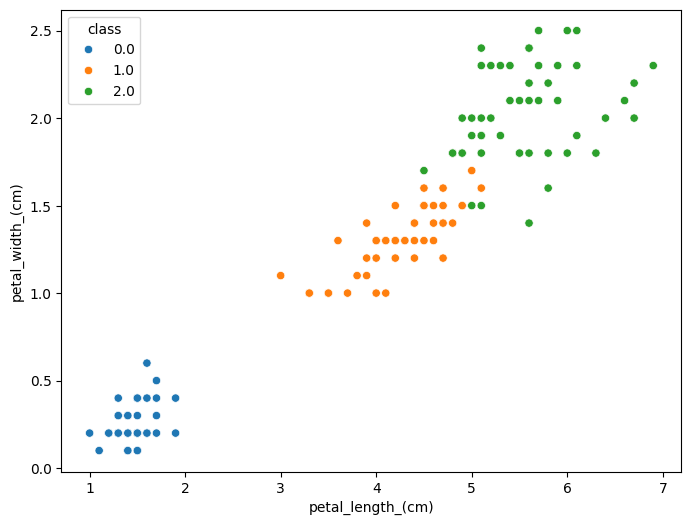

In [17]:
plt.figure(figsize=(8, 6))
_ = sns.scatterplot(x='petal_length_(cm)', y='petal_width_(cm)', hue='class', data=df, legend='full', palette=sns.color_palette()[:3])

In [18]:
df['class'].value_counts()

class
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

Przygotowanie danych do modelu

In [19]:
X = df.copy()
X = X[['petal_length_(cm)', 'petal_width_(cm)', 'class']]
y = X.pop('class')

In [20]:
X.head()

,petal_length_(cm),petal_width_(cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [23]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [26]:
y = y.values.astype('int16')

Budowa klasyfikatora drzewa decyzyjnego

max_depth = 1   

In [27]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=1, random_state=30)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=1, random_state=30)

Wykreślenie granic decyzyjnych

In [ ]:
from mlxtend.plotting import plot_decision_regions